In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (9,6)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r"C:\Users\souad\Desktop\New folder (2)\DATA\Python\Movies-DA-Project\movies.csv")

In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [59]:
#Check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [60]:
#Drop non-finite values, such as NaN (missing values)
df.dropna(inplace=True)

In [61]:
#Check Data Types of Columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [62]:
#datatype changes
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [63]:
#Year column values and Release year values are not matching
#Generating the correct year column

df[['Month-Day','Year-Country']] = df['released'].astype(str).str.split(pat=',', n=1, expand=True)
df['correct_year'] =  df['Year-Country'].str[:5]

In [64]:
#Dropping old or useless column and renaming new one
df.drop(['Month-Day', 'Year-Country', 'year'], axis=1, inplace=True)
df['year'] = df['correct_year']
df.drop(['correct_year'], axis=1, inplace=True)

In [65]:
df.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [67]:
#Drop any duplicates
df.drop_duplicates()

In [68]:
#Sort Data by budget in a Descending order
df.sort_values(by = ['gross'], inplace=True, ascending=False)
pd.set_option('display.max_rows', None)

In [69]:
df.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


In [70]:
#The Total Gross Revenue of the Top Production Companies
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [71]:
#The Yearly Gross Revenue by the Top production companies 
CompanyGross_Sum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGross_Sum_Sorted = CompanyGross_Sum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGross_Sum_Sorted = CompanyGross_Sum_Sorted['gross'].astype('int64') 

CompanyGross_Sum_Sorted

company                year 
Walt Disney Pictures    2019    5773131804
Marvel Studios          2018    4018631866
Universal Pictures      2015    3834354888
Twentieth Century Fox   2009    3793491246
Walt Disney Pictures    2017    3789382071
Paramount Pictures      2011    3565705182
Warner Bros.            2011    3168551343
Walt Disney Pictures    2010    3104474158
Paramount Pictures      2014    3071298586
Columbia Pictures       2019    2932757449
                        2006    2918469353
Marvel Studios          2019    2797501328
Warner Bros.            2018    2774168962
                        2005    2773019821
                        2007    2758633559
Name: gross, dtype: int64

Studying the gross revenue made by movies in correlation with the budget spent and the production company

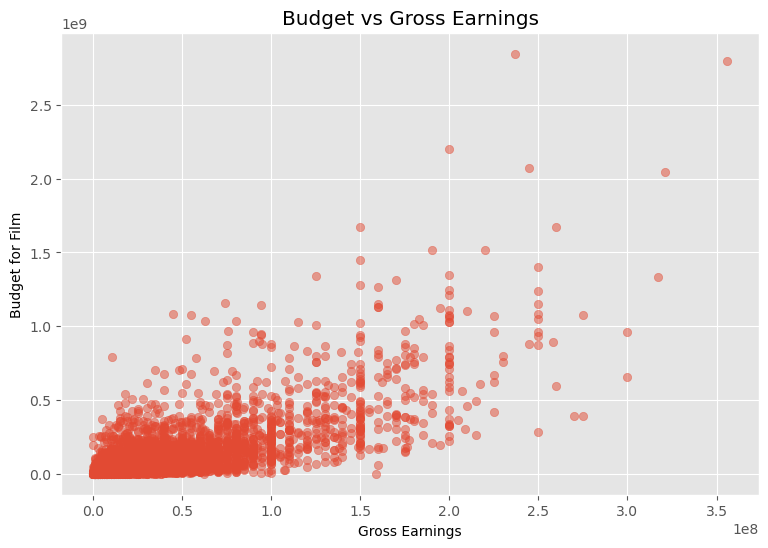

In [72]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

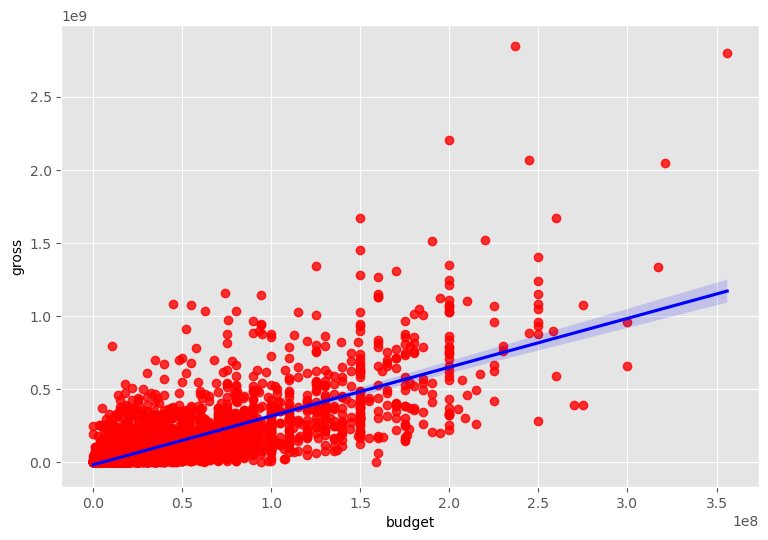

In [73]:
#plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [74]:
#Correlation - pearson , kendall, spearman
df.corr(method='pearson', numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [75]:
df.corr(method='kendall', numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.350185,1.000000,0.346274,0.553625,0.205344
budget,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.292254,0.205344,0.231278,0.176979,1.000000


In [76]:
df.corr(method='spearman', numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.495409,1.000000,0.493461,0.745793,0.300621
budget,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.412155,0.300621,0.330794,0.257400,1.000000


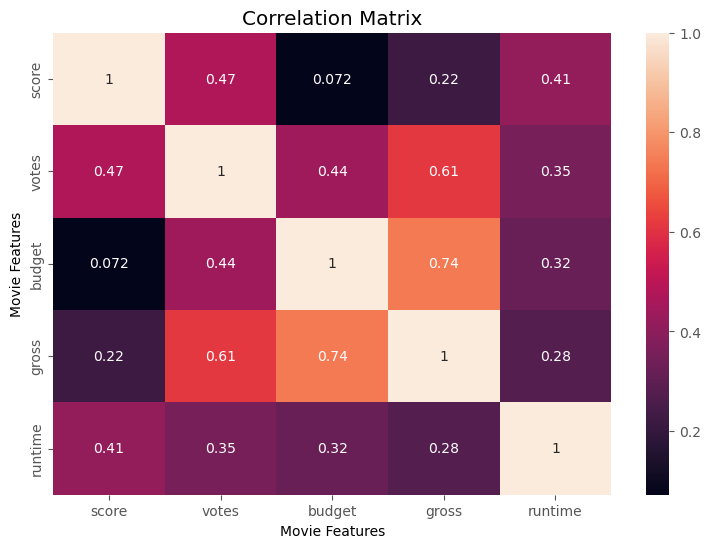

In [77]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [78]:
#Studying the non numeric features by Numerizing

df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(15)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,38
7480,4388,4,2,1126,6.9,222000,1012,1361,457,47,260000000,1670727580,1423,118.0,39
6653,2117,5,0,1303,7.0,593000,335,2523,293,47,150000000,1670516444,1397,124.0,35
6043,3878,5,0,1899,8.0,1300000,1060,1646,1470,47,220000000,1518815515,983,143.0,32
6646,1541,5,0,165,7.1,370000,809,481,1785,47,190000000,1515341399,1397,137.0,35
7494,1530,4,2,2053,6.8,148000,277,1383,1036,47,150000000,1450026933,1422,103.0,39


In [79]:
correlation_matrix = df_numerized.corr(method='pearson')

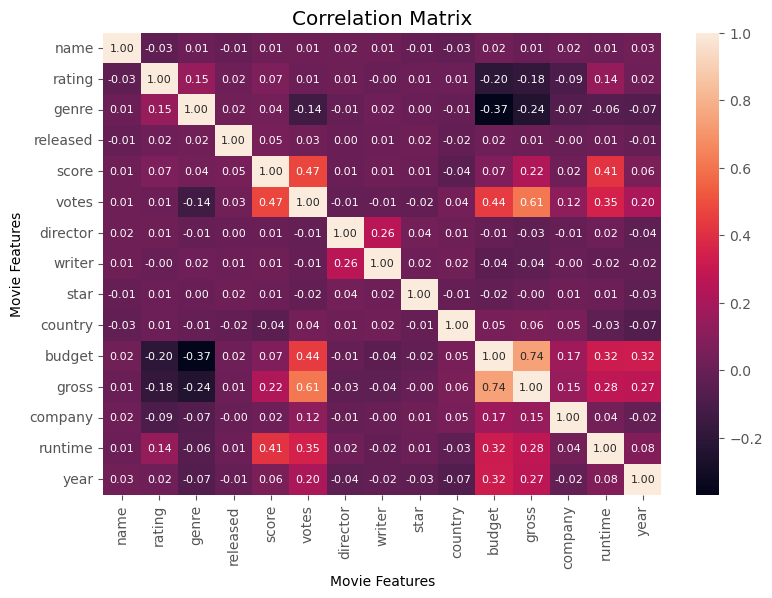

In [80]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [81]:
#Listing the correlation of numerized values
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
          year        0.026759
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
          year        0.019560
genre     name        0.010996
          rating      0.147796
        

In [82]:
sorted_pairs = corr_pairs.sort_values(ascending = True)
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
rating    budget     -0.203946
budget    rating     -0.203946
gross     rating     -0.181906
rating    gross      -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
rating    company    -0.092357
company   rating     -0.092357
country   year       -0.072407
year      country    -0.072407
company   genre      -0.071334
genre     company    -0.071334
year      genre      -0.070699
genre     year       -0.070699
runtime   genre      -0.059237
genre     runtime    -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
          gross      -0.035885
gross     writer     -0.035885
director  year       -0.035738
year      director   -0.035738
country   runtime    -0.034477
runtime   country    -0.034477
year      star       -0.030840
star      year       -0.030840
gross   

In [83]:
#Finding the highest values of correlation with gross revenue
high_corr = sorted_pairs[(sorted_pairs) > 0.3]
high_corr

budget    runtime     0.318695
runtime   budget      0.318695
year      budget      0.321624
budget    year        0.321624
runtime   votes       0.352303
votes     runtime     0.352303
score     runtime     0.414068
runtime   score       0.414068
budget    votes       0.439675
votes     budget      0.439675
          score       0.474256
score     votes       0.474256
votes     gross       0.614751
gross     votes       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
year      year        1.000000
dtype: float64

In [84]:
df.head(15)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,38
7480,4388,4,2,1126,6.9,222000,1012,1361,457,47,260000000,1670727580,1423,118.0,39
6653,2117,5,0,1303,7.0,593000,335,2523,293,47,150000000,1670516444,1397,124.0,35
6043,3878,5,0,1899,8.0,1300000,1060,1646,1470,47,220000000,1518815515,983,143.0,32
6646,1541,5,0,165,7.1,370000,809,481,1785,47,190000000,1515341399,1397,137.0,35
7494,1530,4,2,2053,6.8,148000,277,1383,1036,47,150000000,1450026933,1422,103.0,39


Conclusion: the most movie production features that are correlated to the gross revenue of the movie is the budget that is being spent